# 7 Guided-wave optics

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, brentq


## 7.1 Planar-mirror waveguides

<p style="color: red;"> For TEM: </p>

$\frac{2 \pi}{\lambda} 2 d \sin(\theta_m) = 2\pi m \Rightarrow \sin(\theta_m) = m \frac{\lambda}{2d} \Rightarrow \theta_m = \sin^{-1} \left(m\frac{\lambda}{2d}\right)$

with $m \in \{1, 2, 3, ... \}$.

$k_{ym} = m \frac{\pi}{d}, \quad k = n k_0 = n \frac{2\pi}{\lambda}, \quad \beta_m = k_{zm} = k \cos(\theta_m)$

$\beta_m^2 = k^2 - k_{ym}^2 = k^2 - \left( \frac{m \pi}{d} \right)^2 \Rightarrow \beta_m = \sqrt{k^2 - \left( \frac{m \pi}{d} \right)^2}$

$\therefore \beta_m(\lambda; n, d) = \pi \sqrt{\left(\frac{2n}{\lambda}\right)^2 + \left(\frac{m}{d}\right)^2}$

Therefore, we control the propagation constant $\beta_m$ of the m-th order mode with the spacing between the mirrors ($d$), the refractive index of the material between the mirrors ($n$), and the wavelength of the incident light ($\lambda$).

The number of modes: $M \underset{\cdot}{=} \frac{2d}{\lambda}$.

In [2]:
d = 7 # Mirror spacing [um]
wv = 1.55 # Wavelength [um]
M = math.floor(2*d/wv) # Number of modes
print(f'Number of modes: {M}')

Number of modes: 9


Find $\theta_m$:
- Fixed: $d$.
- Varying: $\lambda$, $m$.

In [5]:
d = 3 # Mirror spacing [um]
m_list = [1, 2, 3, 5] # Mode orders considered
wv_pts = np.linspace(0.35, 1.7, 100) # Wavelength points [um]

C:\Users\eduar\AppData\Local\Temp\ipykernel_11164\3725075296.py:8: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(m * wv_pts / (2 * d)) # in radians


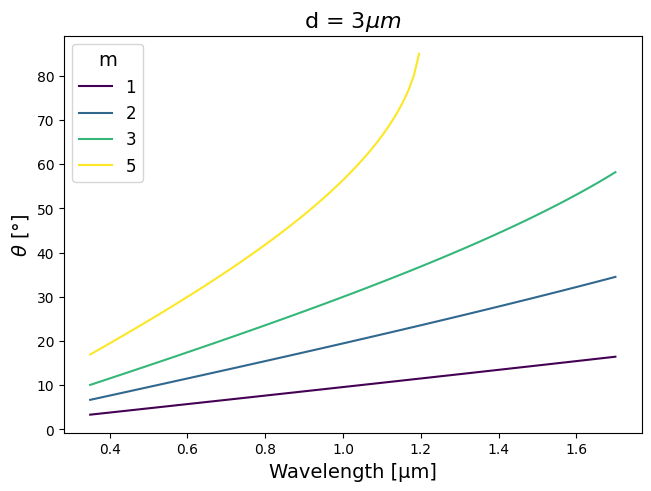

In [7]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf'd = {d}$\mu m$', fontsize=16)
ax.set_xlabel('Wavelength [μm]', fontsize=14)
ax.set_ylabel(r'$\theta$ [°]', fontsize=14)
cmap = plt.get_cmap('viridis')

for idx, m in enumerate(m_list):
    theta = np.arcsin(m * wv_pts / (2 * d)) # in radians

    color = cmap(idx/(len(m_list)-1)) 
    ax.plot(wv_pts, theta * 180/np.pi, color = color, label=m)
    
ax.legend(title = 'm', title_fontsize=14, loc='upper left', fontsize=12)
plt.show()

- Fixed: $m$.
- Varying: $\lambda$, $d$.

In [8]:
m = 1 # Mode order considered
d_list = [0.5, 1, 2, 5] # Mirror spacing points [um]
wv_pts = np.linspace(0.35, 1.7, 100) # Wavelength points [um]

C:\Users\eduar\AppData\Local\Temp\ipykernel_11164\2493112392.py:8: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(m * wv_pts / (2 * d)) # in radians


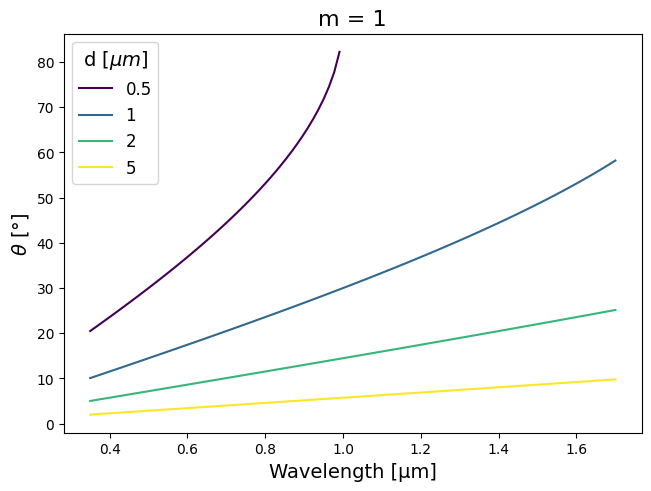

In [9]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf'm = {m}', fontsize=16)
ax.set_xlabel('Wavelength [μm]', fontsize=14)
ax.set_ylabel(r'$\theta$ [°]', fontsize=14)
cmap = plt.get_cmap('viridis')

for idx, d in enumerate(d_list):
    theta = np.arcsin(m * wv_pts / (2 * d)) # in radians

    color = cmap(idx/(len(d_list)-1)) 
    ax.plot(wv_pts, theta * 180/np.pi, color = color, label=d)
    
ax.legend(title = r'd [$\mu m$]', title_fontsize=14, loc='upper left', fontsize=12)
plt.show()

Find $\beta_m$:
- Fixed: $d$, $n$.
- Varying: $\lambda$, $m$.

In [10]:
d = 3 # Mirror spacing [um]
n = 1.5 # Refractive index of material between mirrors
wv_pts = np.linspace(0.35, 1.7, 100) # Wavelength points [um]
m_list = [1, 2, 3, 5, 7, 10, 12] # Mode orders considered

C:\Users\eduar\AppData\Local\Temp\ipykernel_11164\2070609682.py:8: RuntimeWarning: invalid value encountered in sqrt
  beta = np.pi * np.sqrt((2*n/wv_pts)**2 - (m/d)**2)


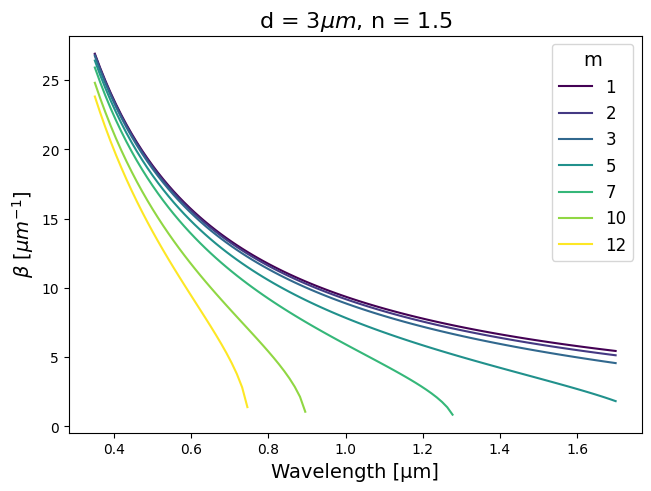

In [11]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf'd = {d}$\mu m$, n = {n}', fontsize=16)
ax.set_xlabel('Wavelength [μm]', fontsize=14)
ax.set_ylabel(r'$\beta$ $[μm^{-1}]$', fontsize=14)
cmap = plt.get_cmap('viridis')

for idx, m in enumerate(m_list):
    beta = np.pi * np.sqrt((2*n/wv_pts)**2 - (m/d)**2)

    color = cmap(idx/(len(m_list)-1)) 
    ax.plot(wv_pts, beta, color = color, label=m)
    
ax.legend(title = 'm', title_fontsize=14, loc='upper right', fontsize=12)
plt.show()

Fix $\lambda$, $n$, vary $d$ and $m$:

In [12]:
wv = 1.55 # Wavelength [um]
n = 1.5 # Refractive index of material between mirrors
d_pts = np.linspace(0.1, 10, 100) # Mirror spacing points [um]
m_list = [1, 2, 3, 4, 5] # Mode orders considered

C:\Users\eduar\AppData\Local\Temp\ipykernel_11164\4210774091.py:8: RuntimeWarning: invalid value encountered in sqrt
  beta = np.pi * np.sqrt((2*n/wv)**2 - (m/d_pts)**2)


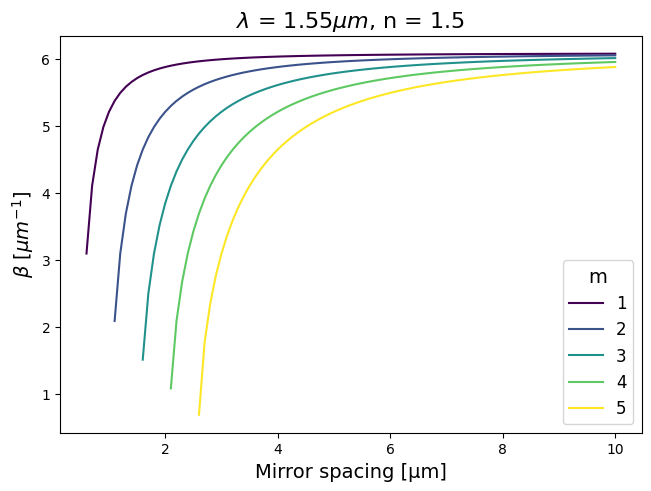

In [13]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf'$\lambda$ = {wv}$\mu m$, n = {n}', fontsize=16)
ax.set_xlabel('Mirror spacing [μm]', fontsize=14)
ax.set_ylabel(r'$\beta$ $[μm^{-1}]$', fontsize=14)
cmap = plt.get_cmap('viridis')

for idx, m in enumerate(m_list):
    beta = np.pi * np.sqrt((2*n/wv)**2 - (m/d_pts)**2)

    color = cmap(idx/(len(m_list)-1)) 
    ax.plot(d_pts, beta, color = color, label=m)
    
ax.legend(title = 'm', title_fontsize=14, loc='lower right', fontsize=12)
plt.show()

Fix $m$, $n$, vary $d$ and $\lambda$:

In [14]:
n = 1.5 # Refractive index of material between mirrors
wv_pts = np.linspace(0.35, 1.7, 100) # Wavelength points [um]
d_pts = np.array([0.2, 0.3, 0.5, 1, 2, 5]) # Mirror spacing points [um]
m = 1 # Mode orders considered

C:\Users\eduar\AppData\Local\Temp\ipykernel_11164\302224617.py:8: RuntimeWarning: invalid value encountered in sqrt
  beta_m = np.pi * np.sqrt((2*n/wv_pts)**2 - (m/d)**2)


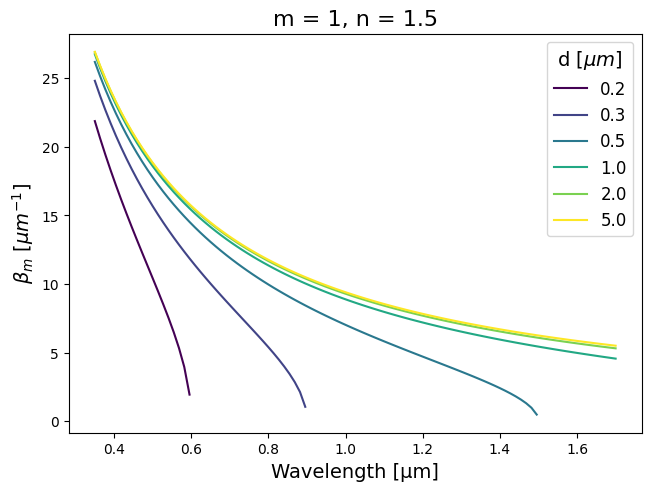

In [15]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf'm = {m}, n = {n}', fontsize=16)
ax.set_xlabel('Wavelength [μm]', fontsize=14)
ax.set_ylabel(r'$\beta_m$ $[μm^{-1}]$', fontsize=14)
cmap = plt.get_cmap('viridis')

for idx, d in enumerate(d_pts):
    beta_m = np.pi * np.sqrt((2*n/wv_pts)**2 - (m/d)**2)

    color = cmap(idx/(len(d_pts)-1)) 
    ax.plot(wv_pts, beta_m, color = color, label=d)
    
ax.legend(title = r'd [$\mu m$]', title_fontsize=14, loc='upper right', fontsize=12)
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_11164\1172904733.py:6: RuntimeWarning: invalid value encountered in sqrt
  beta_mesh = np.pi * np.sqrt((2*n/wv_mesh)**2 - (m/d_mesh)**2)


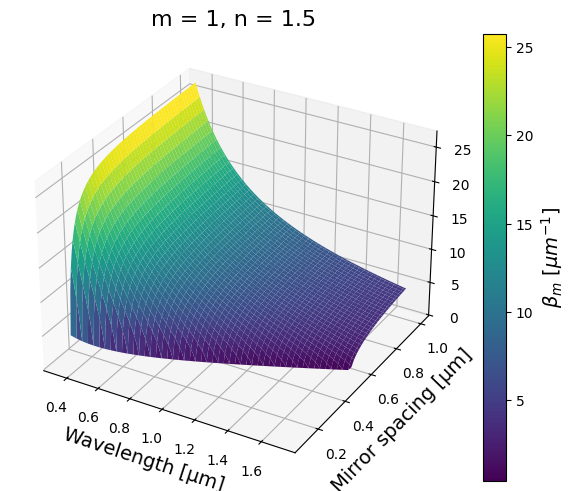

In [16]:
n = 1.5 # Refractive index of material between mirrors
m = 1 # Mode orders considered
wv_pts = np.linspace(0.35, 1.7, 100) # Wavelength points [um]
d_pts = np.linspace(0.1, 1, 100) # Mirror spacing points [um]
wv_mesh, d_mesh = np.meshgrid(wv_pts, d_pts)
beta_mesh = np.pi * np.sqrt((2*n/wv_mesh)**2 - (m/d_mesh)**2)

fig = plt.figure(layout='constrained')
ax = fig.add_subplot(111, projection='3d')
ax.set_title(rf'm = {m}, n = {n}', fontsize=16)
ax.set_xlabel('Wavelength [μm]', fontsize=14)
ax.set_ylabel('Mirror spacing [μm]', fontsize=14)

surf = ax.plot_surface(wv_mesh, d_mesh, beta_mesh, cmap='viridis')

cbar = fig.colorbar(surf)
cbar.set_label(r'$\beta_m$ $[μm^{-1}]$', fontsize=14)
plt.show()

- Fixed: $\lambda$, $d$, 
- Varying: $n$, $m$.

In [17]:
wv = 1.55 # Wavelength [um]
d = 3 # Mirror spacing [um]
m_list = [1, 2, 3, 4, 5] # Mode order considered
n_pts = np.linspace(1, 1.7, 100) # Refractive index points of material between mirrors

C:\Users\eduar\AppData\Local\Temp\ipykernel_11164\1077076434.py:8: RuntimeWarning: invalid value encountered in sqrt
  beta = np.pi * np.sqrt((2*n_pts/wv)**2 - (m/d)**2)


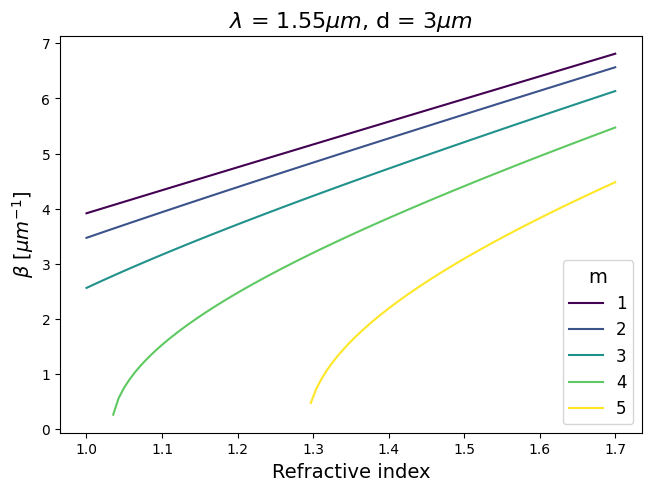

In [18]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf'$\lambda$ = {wv}$\mu m$, d = {d}$\mu m$', fontsize=16)
ax.set_xlabel('Refractive index', fontsize=14)
ax.set_ylabel(r'$\beta$ $[μm^{-1}]$', fontsize=14)
cmap = plt.get_cmap('viridis')

for idx, m in enumerate(m_list):
    beta = np.pi * np.sqrt((2*n_pts/wv)**2 - (m/d)**2)

    color = cmap(idx/(len(m_list)-1)) 
    ax.plot(n_pts, beta, color = color, label=m)
    
ax.legend(title = 'm', title_fontsize=14, loc='lower right', fontsize=12)
plt.show()

## 7.2 Planar dielectric waveguides

$\overline{\theta}_c = \cos^{-1}\left(\frac{n_2}{n_1}\right)$

$\theta_c = \frac{\pi}{2} - \overline{\theta}_c  = \sin^{-1}\left(\frac{n_2}{n_1}\right)$

Calculate $\theta_c$:

C:\Users\eduar\AppData\Local\Temp\ipykernel_24092\1394801216.py:10: RuntimeWarning: invalid value encountered in arcsin
  theta_c_pts = np.asin(n2_pts/n1)


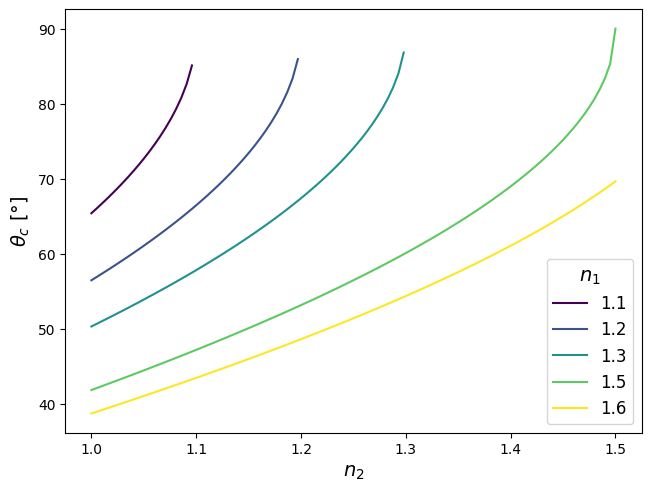

In [72]:
n1_list = [1.1, 1.2, 1.3, 1.5, 1.6] # Fixed
n2_pts = np.linspace(1, 1.5, 100)

fig, ax = plt.subplots(layout='constrained')
ax.set_xlabel(r'$n_2$', fontsize=14)
ax.set_ylabel(r'$\theta_c$ [°]', fontsize=14)
cmap = plt.get_cmap('viridis')

for idx, n1 in enumerate(n1_list):
    theta_c_pts = np.asin(n2_pts/n1)

    ax.plot(n2_pts, theta_c_pts * 180/np.pi, label=n1, color = cmap(idx/(len(n1_list)-1)))

ax.legend(title = r'$n_1$', title_fontsize=14, loc='lower right', fontsize=12)
plt.show()


$\frac{2\pi}{\lambda} 2d \sin(\theta) - 2\phi_r = 2 \pi m \Rightarrow \tan\left(\pi \frac{d}{\lambda} \sin(\theta) - m \frac{\pi}{2}\right) = \tan\left(\frac{\phi_r}{2}\right)$

with $m \in \{0, 1, 2, ...\}$.

<p style="color: lightgreen;"> For TE: </p>

$\tan\left(\frac{\phi_x}{2}\right) = \frac{\sqrt{\sin^2(\theta_1) - \sin^2(\theta_c)}}{\cos(\theta_1)}$

<p style="color: lightblue;"> For TM: </p>

$\theta_B = \tan^{-1}\left( \frac{n_2}{n_1} \right)$

$\tan \left( \frac{\phi_y}{2} \right) = \frac{\sqrt{\sin^2(\theta_1) - \sin^2(\theta_c)}}{\cos(\theta_1) \sin^2(\theta_c)}$

Substituting $\theta_1 = \pi/2 - \theta_m$ and $\theta_c = \pi/2 - \overline{\theta}_c$:

<p style="color: lightgreen;"> For TE: </p>

$\tan\left(\frac{\phi_x}{2}\right) = \sqrt{\frac{\sin^2(\overline{\theta}_c)}{\sin^2(\theta_m)} - 1} = \tan\left( \pi \frac{d}{\lambda} \sin(\theta_m) - m \frac{\pi}{2} \right)$

<p style="color: lightblue;"> For TM: </p>

$\tan\left(\frac{\phi_x}{2}\right) = \frac{1}{\cos^2(\overline{\theta}_c)}\sqrt{\frac{\sin^2(\overline{\theta}_c)}{\sin^2(\theta_m)} - 1} = \tan\left( \pi \frac{d}{\lambda} \sin(\theta_m) - m \frac{\pi}{2} \right)$

For each value of $d$, $n_1$, $n_2$, and $\lambda$ there will be a specific set of modes.

Using the Newton-Raphson Method: $x_{j+1} = x_j - \frac{f(x_j)}{f'(x_j)}$.

In [87]:
wv = 1.55 # Wavelength [um]
k0 = 2 * np.pi / wv # Free space wavenumber [um^-1]
d = 5 # Core thickness [um]
n2 = 1.0 # Refractive index of cladding
n1 = 1.5 # Refractive index of core
m = 0 # Mode order considered

theta_c_bar = np.arccos(n2/n1)
print(f'theta_c_bar = {round(theta_c_bar * 180/np.pi, 1)}°')

theta_pts = np.linspace(0.01, np.pi/2 - 0.01, 200) # theta_m points [rad]
r_pts = np.sin(theta_pts) # r_m points

theta_c_bar = 48.2°


<p style="color: lightgreen;"> For TE: </p>

Visualization:

\begin{cases}
    f_1(r_m) = \tan\left[ \pi \left(\frac{r_m d}{\lambda} - \frac{m}{2}\right) \right] \\
    f_2(r_m) = \sqrt{\frac{\sin^2(\overline{\theta}_c)}{r_m^2} - 1}
\end{cases}
where $r_m = \sin(\theta_m)$ and $f_1(r_m) = f_2(r_m)$.

C:\Users\eduar\AppData\Local\Temp\ipykernel_24092\1260744035.py:2: RuntimeWarning: invalid value encountered in sqrt
  f2_pts = np.sqrt(np.sin(theta_c_bar)**2 / r_pts**2 - 1)


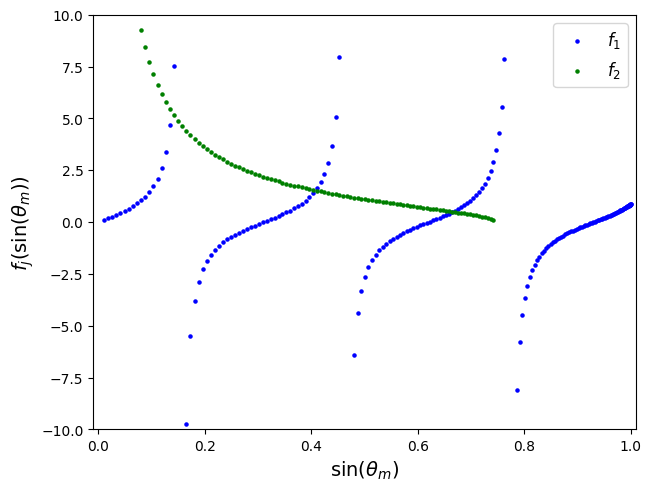

In [77]:
f1_pts = np.tan(np.pi * d * r_pts / wv - np.pi * m / 2)
f2_pts = np.sqrt(np.sin(theta_c_bar)**2 / r_pts**2 - 1)

fig, ax = plt.subplots(layout='constrained')
ax.set_xlabel(r'$\sin(\theta_m)$', fontsize=14)
ax.set_ylabel(r'$f_j(\sin(\theta_m))$', fontsize=14)
ax.set_xlim(-0.01, 1 + 0.01)
ax.set_ylim(-10, 10)

ax.scatter(r_pts, f1_pts, c='blue', s = 5, label=r'$f_1$')
ax.scatter(r_pts, f2_pts, c='green', s = 5, label=r'$f_2$')

ax.legend(loc='upper right', fontsize=12)
plt.show()

$M \dot{=} 2 \frac{d}{\lambda} NA$

$NA = \sqrt{n_1^2 - n_2^2}$

In [78]:
NA = np.sqrt(n1**2 - n2**2)
print(f'NA = {NA:.4f}')
M = math.ceil(2 * d / wv * NA)
print(f'Number of modes: {M}')

NA = 1.1180
Number of modes: 8



$$f(\theta_m) = \tan\left[ \pi \left(\frac{d \sin(\theta_m)}{\lambda} - \frac{m}{2}\right) \right] - \sqrt{\frac{\sin^2(\overline{\theta}_c)}{\sin^2(\theta_m)} - 1}$$

$$\frac{d f}{d \theta_m}(\theta_m) = \frac{\pi d \sqrt{1 - \sin^2(\theta_m)}}{\lambda \cos^2\left\{ \tan\left[\ \pi \left(\frac{d \sin(\theta_m)}{\lambda} - \frac{m}{2}\right)\right]\right\}} + \frac{\sin^2(\overline{\theta}_c) \sqrt{1 - \sin^2(\theta_m)}}{\sin^3(\theta_m) \sqrt{\frac{\sin^2(\overline{\theta}_c)}{\sin^2(\theta_m)} - 1}}$$

In [79]:
f = lambda r: np.tan(np.pi*(d * r/wv - m/2)) - np.sqrt(np.sin(theta_c_bar)**2/r**2 - 1)
df = lambda r: np.pi * d * np.sqrt(1 - r**2) / (wv * np.cos(np.tan(np.pi * (d * r / wv - m/2)))**2) + np.sin(theta_c_bar)**2 * np.sqrt(1 - r**2) / (r**3 * np.sqrt(np.sin(theta_c_bar)**2/r**2 - 1))

In [80]:
root = brentq(f, 0.4, 0.7)
# root = newton(f, 0.1, df)
print(f"Root found: {root:.6f}")

Root found: 0.665960


In [88]:
r_roots = np.array([0.136788, 0.407864, 0.665960])

$\beta_m = n_1 k_0 \cos(\theta_m)$

In [89]:
theta_roots = np.asin(r_roots)
beta_pts = n1 * k0 * np.cos(theta_roots)

# Guiding condition:
mask = (n2 * k0 < beta_pts) & (beta_pts < n1 * k0)
beta_pts_masked = np.where(mask, beta_pts, np.nan)

print(beta_pts_masked)
print()

txt = ''
for idx, beta in enumerate(beta_pts_masked):
    txt += f'beta_{idx} = {beta:.4f} um^-1\n'
print(txt)

[6.02334729 5.55175783 4.53597813]

beta_0 = 6.0233 um^-1
beta_1 = 5.5518 um^-1
beta_2 = 4.5360 um^-1



$n_2 k_0 \leq \beta_m \leq n_1 k_0$

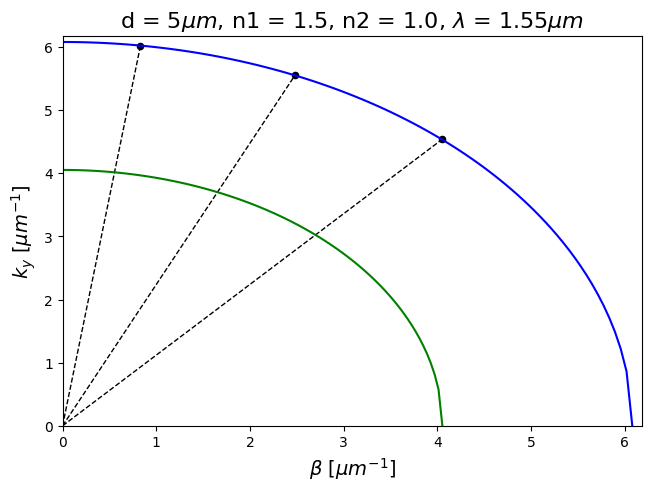

In [90]:
fig, ax = plt.subplots(layout = 'constrained')
ax.set_title(rf'd = {d}$\mu m$, n1 = {n1}, n2 = {n2}, $\lambda$ = {wv}$\mu m$', fontsize=16)
ax.set_xlabel(r'$\beta$ [$\mu m^{-1}$]', fontsize=14)
ax.set_ylabel(r'$k_y$ [$\mu m^{-1}$]', fontsize=14)
ax.set_xlim(0, n1 * k0 + 0.1)
ax.set_ylim(0, n1 * k0 + 0.1)

for beta in beta_pts_masked:
    ky = np.sqrt((n1 * k0)**2 - beta**2)
    ax.scatter(ky, beta, color = 'k', s = 20)
    ax.plot([0, ky], [0, beta], color = 'k', linestyle = '--', linewidth = 1)

ky_aux1 = np.linspace(0, n1 * k0, 100)
beta_aux1 = np.sqrt((n1 * k0)**2 - ky_aux1**2)
ax.plot(ky_aux1, beta_aux1, color = 'blue')

ky_aux2 = np.linspace(0, n2 * k0, 100)
beta_aux2 = np.sqrt((n2 * k0)**2 - ky_aux2**2)
ax.plot(ky_aux2, beta_aux2, color = 'green')

plt.show()

<p style="color: lightblue;"> For TM: </p>

Visualization:

\begin{cases}
    f_1(r_m) = \tan\left[ \pi \left(\frac{r_m d}{\lambda} - \frac{m}{2}\right) \right] \\
    f_2(r_m) = \frac{1}{\cos^2(\overline{\theta}_c)} \sqrt{\frac{\sin^2(\overline{\theta}_c)}{r_m^2} - 1}
\end{cases}

In [91]:
f1_pts = np.tan(np.pi * d * r_pts / wv - np.pi * m / 2)
f2_pts = np.sqrt(np.sin(theta_c_bar)**2 / r_pts**2 - 1) / np.cos(theta_c_bar)**2

C:\Users\eduar\AppData\Local\Temp\ipykernel_24092\2490710787.py:2: RuntimeWarning: invalid value encountered in sqrt
  f2_pts = np.sqrt(np.sin(theta_c_bar)**2 / r_pts**2 - 1) / np.cos(theta_c_bar)**2


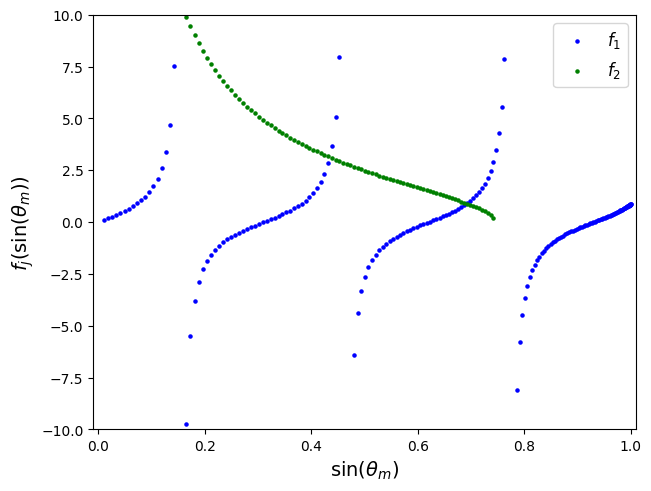

In [92]:
fig, ax = plt.subplots(layout='constrained')
ax.set_xlabel(r'$\sin(\theta_m)$', fontsize=14)
ax.set_ylabel(r'$f_j(\sin(\theta_m))$', fontsize=14)
ax.set_xlim(-0.01, 1 + 0.01)
ax.set_ylim(-10, 10)

ax.scatter(r_pts, f1_pts, c='blue', s = 5, label=r'$f_1$')
ax.scatter(r_pts, f2_pts, c='green', s = 5, label=r'$f_2$')

ax.legend(loc='upper right', fontsize=12)
plt.show()


$$f(\theta_m) = \tan\left[ \pi \left(\frac{d \sin(\theta_m)}{\lambda} - \frac{m}{2}\right) \right] - \frac{1}{\cos^2(\overline{\theta}_c)} \sqrt{\frac{\sin^2(\overline{\theta}_c)}{\sin^2(\theta_m)} - 1}$$

$$\frac{d f}{d \theta_m}(\theta_m) = \frac{\pi d \sqrt{1 - \sin^2(\theta_m)}}{\lambda \cos^2\left\{ \tan\left[\ \pi \left(\frac{d \sin(\theta_m)}{\lambda} - \frac{m}{2}\right)\right]\right\}} + \frac{\tan^2(\overline{\theta}_c) \sqrt{1 - \sin^2(\theta_m)}}{\sin^3(\theta_m) \sqrt{\frac{\sin^2(\overline{\theta}_c)}{\sin^2(\theta_m)} - 1}}$$

In [93]:
f = lambda r_m: np.tan(np.pi*(d * r_m/wv - m/2)) - np.sqrt(np.sin(theta_c_bar)**2/r_m**2 - 1) / np.cos(theta_c_bar)**2
df = lambda r_m: np.pi * d * np.sqrt(1 - r_m**2) / (wv * np.cos(np.tan(np.pi * (d * r_m / wv - m/2)))**2) + np.tan(theta_c_bar)**2 * np.sqrt(1 - r_m**2) / (r_m**3 * np.sqrt(np.sin(theta_c_bar)**2/r_m**2 - 1))

In [94]:
root = brentq(f, 0.5, 0.7)
# root = newton(f, 0.35, df)
print(f"Root found: {root:.6f}")

Root found: 0.692221


In [96]:
r_roots = np.array([0.434537, 0.692221])

In [97]:
theta_roots = np.asin(r_roots)
beta_pts = n1 * k0 * np.cos(theta_roots)

# Guiding condition:
mask = (n2 * k0 < beta_pts) & (beta_pts < n1 * k0)
beta_pts_masked = np.where(mask, beta_pts, np.nan)

print(beta_pts_masked)
print()

txt = ''
for idx, beta in enumerate(beta_pts_masked):
    txt += f'beta_{idx} = {beta:.4f} um^-1\n'
print(txt)

[5.47642826 4.38821059]

beta_0 = 5.4764 um^-1
beta_1 = 4.3882 um^-1



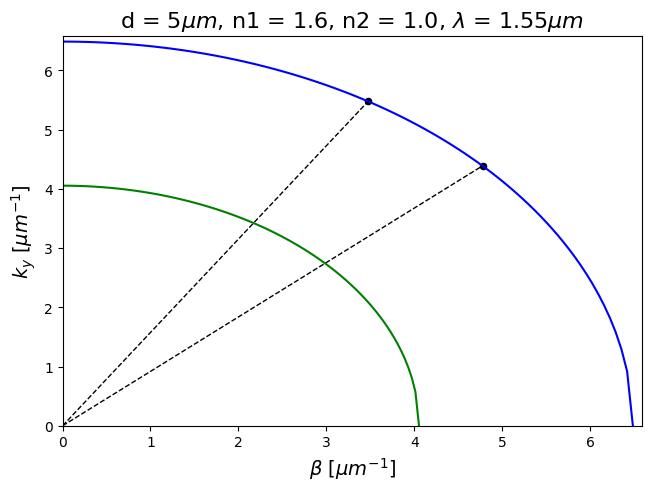

In [99]:
fig, ax = plt.subplots(layout = 'constrained')
ax.set_title(rf'd = {d}$\mu m$, n1 = {n1}, n2 = {n2}, $\lambda$ = {wv}$\mu m$', fontsize=16)
ax.set_xlabel(r'$\beta$ [$\mu m^{-1}$]', fontsize=14)
ax.set_ylabel(r'$k_y$ [$\mu m^{-1}$]', fontsize=14)
ax.set_xlim(0, n1 * k0 + 0.1)
ax.set_ylim(0, n1 * k0 + 0.1)

for beta in beta_pts_masked:
    ky = np.sqrt((n1 * k0)**2 - beta**2)
    ax.scatter(ky, beta, color = 'k', s = 20)
    ax.plot([0, ky], [0, beta], color = 'k', linestyle = '--', linewidth = 1)

ky_aux1 = np.linspace(0, n1 * k0, 100)
beta_aux1 = np.sqrt((n1 * k0)**2 - ky_aux1**2)
ax.plot(ky_aux1, beta_aux1, color = 'blue')

ky_aux2 = np.linspace(0, n2 * k0, 100)
beta_aux2 = np.sqrt((n2 * k0)**2 - ky_aux2**2)
ax.plot(ky_aux2, beta_aux2, color = 'green')

plt.show()

Calculate $\theta_B$:

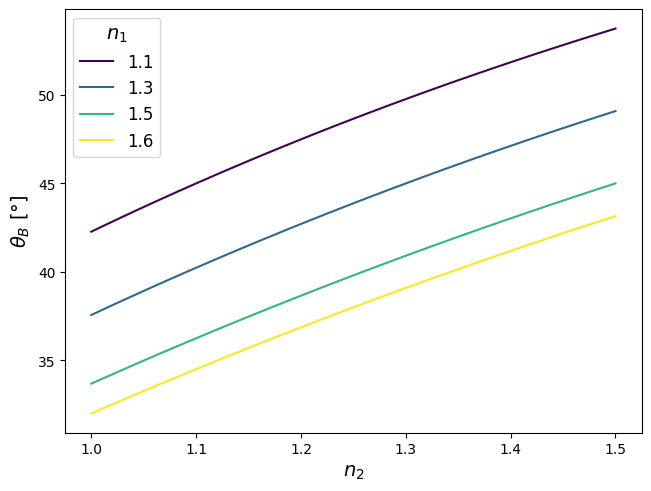

In [98]:
n1_list = [1.1, 1.3, 1.5, 1.6] # Fixed
n2_pts = np.linspace(1, 1.5, 100)

fig, ax = plt.subplots(layout='constrained')
ax.set_xlabel(r'$n_2$', fontsize=14)
ax.set_ylabel(r'$\theta_B$ [°]', fontsize=14)
cmap = plt.get_cmap('viridis')

for idx, n1 in enumerate(n1_list):
    theta_b_pts = np.atan(n2_pts/n1)

    ax.plot(n2_pts, theta_b_pts * 180/np.pi, label=n1, color = cmap(idx/(len(n1_list)-1)))

ax.legend(title = r'$n_1$', title_fontsize=14, loc='upper left', fontsize=12)
plt.show()

## 7.3 Two-dimensional waveguides

### 7.3.1 Rectangular mirror waveguide

\begin{cases}
    2 k_x w = 2\pi m_x \\
    2 k_y t = 2\pi m_y
\end{cases}
for $m_x \in \{1, 2, 3, ...\}$ and $m_y \in \{1, 2, 3, ...\}$. 

So, $k_x = m_x\frac{\pi}{w}$ and $k_y = m_y\frac{\pi}{t}$.

$k_x^2 + k_y^2 + \beta_{m_x,m_y}^2 = n^2 k_0^2 \Rightarrow \beta_{m_x, m_y} = \pi \sqrt{\left(\frac{2n}{\lambda}\right)^2 - \left[ \left(\frac{m_x}{w}\right)^2 + \left(\frac{m_y}{t}\right)^2 \right]} = \pi \sqrt{\frac{4n^2}{\lambda^2} - \frac{m_x^2}{w^2} - \frac{m_y^2}{t^2}}$

- Fixed: $t$, $n$, $m_x$, $m_y$.
- Varying: $\lambda$, $w$.

In [31]:
w_list = [0.2, 0.3, 0.5, 1, 3] # width points [um]
t = 5 # thickness [um]
n = 1.5 # Refractive index between the mirrors
mx = 1 # Considered mode order in x direction
my = 1 # Considered mode order in y direction

wv_pts = np.linspace(0.3, 1.7, 100) # Wavelength points [um]
k0_pts = 2 * np.pi / wv_pts # Free space wavenumber points [um^-1]

C:\Users\eduar\AppData\Local\Temp\ipykernel_11680\1851829157.py:7: RuntimeWarning: invalid value encountered in sqrt
  beta_pts = np.pi * np.sqrt((2*n/wv_pts)**2 - (mx/w)**2 - (my/t)**2)


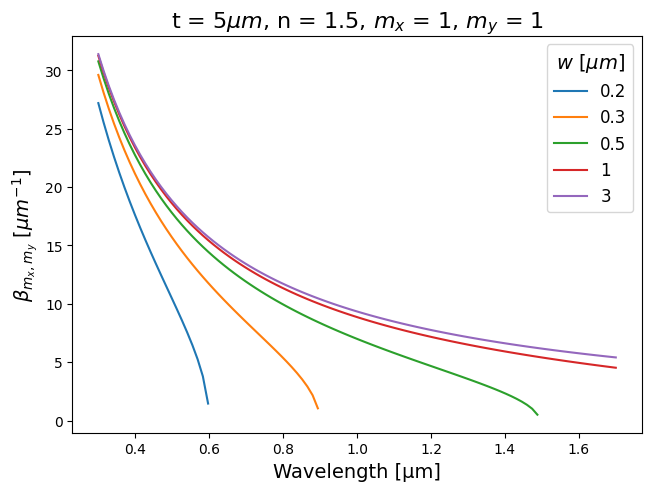

In [33]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf't = {t}$\mu m$, n = {n}, $m_x$ = {mx}, $m_y$ = {my}', fontsize=16)
ax.set_xlabel('Wavelength [μm]', fontsize=14)
ax.set_ylabel(r'$\beta_{m_x,m_y}$ $[μm^{-1}]$', fontsize=14)

for idx, w in enumerate(w_list):
    beta_pts = np.pi * np.sqrt((2*n/wv_pts)**2 - (mx/w)**2 - (my/t)**2)
    ax.plot(wv_pts, beta_pts, label=w)

ax.legend(title = r'$w$ [$\mu m$]', title_fontsize=14, loc='upper right', fontsize=12)
plt.show()

- Fixed: $t$, $w$, $n$.
- Varying: $\lambda$, $m_x$, $m_y$.

In [38]:
w = 3 # width [um]
t = 5 # thickness [um]
n = 1.5 # Refractive index between the mirrors
mx_list = np.array([1, 5]) # Considered mode order in x direction
my_list = np.array([1, 5, 10]) # Considered mode order in y direction
m_tuples = [(mx, my) for mx in mx_list for my in my_list]

wv_pts = np.linspace(0.3, 1.7, 100) # Wavelength points [um]
k0_pts = 2 * np.pi / wv_pts # Free space wavenumber points [um^-1]

C:\Users\eduar\AppData\Local\Temp\ipykernel_11680\1497032817.py:7: RuntimeWarning: invalid value encountered in sqrt
  beta_pts = np.pi * np.sqrt((2*n/wv_pts)**2 - (mx/w)**2 - (my/t)**2)


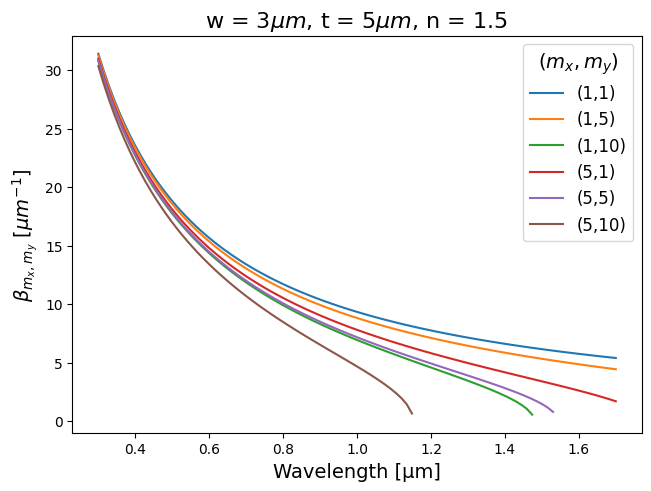

In [37]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf'w = {w}$\mu m$, t = {t}$\mu m$, n = {n}', fontsize=16)
ax.set_xlabel('Wavelength [μm]', fontsize=14)
ax.set_ylabel(r'$\beta_{m_x,m_y}$ $[μm^{-1}]$', fontsize=14)

for idx, (mx, my) in enumerate(m_tuples):
    beta_pts = np.pi * np.sqrt((2*n/wv_pts)**2 - (mx/w)**2 - (my/t)**2)
    ax.plot(wv_pts, beta_pts, label=f'({mx},{my})')

ax.legend(title = r'$(m_x,m_y)$', title_fontsize=14, loc='upper right', fontsize=12)
plt.show()

$k_x^2 + k_y^2 \leq n^2 k_0^2 \Rightarrow \left(\frac{m_x}{w}\right)^2 + \left(\frac{m_y}{t}\right)^2 \leq \left(\frac{2n}{\lambda}\right)^2$

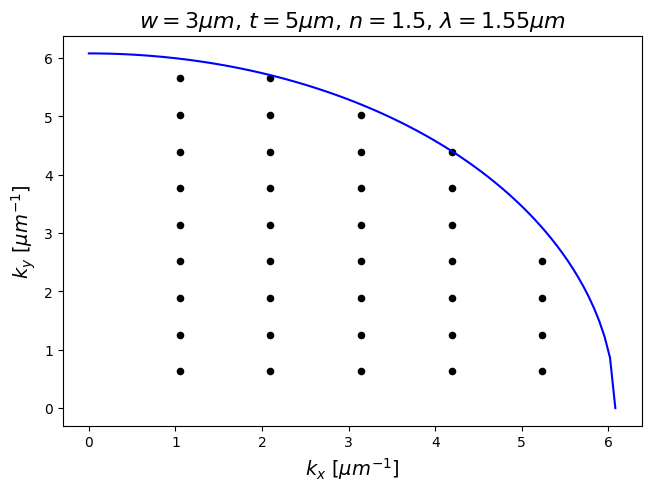

Number of modes: 37


In [50]:
n = 1.5 # Refractive index between the mirrors
wv = 1.55 # Wavelength [um]
mx_pts = np.arange(1, math.ceil(2 * n * w / wv))
my_pts = np.arange(1, math.ceil(2 * n * t / wv))


fig, ax = plt.subplots(layout='constrained')
ax.set_title(rf'$w = {w}\mu m$, $t = {t}\mu m$, $n = {n}$, $\lambda = {wv}\mu m$', fontsize=16)
ax.set_xlabel(r'$k_x$ $[\mu m^{-1}]$', fontsize=14)
ax.set_ylabel(r'$k_y$ $[\mu m^{-1}]$', fontsize=14)

kx_aux = np.linspace(0, 2 * n * np.pi / wv, 100)
ky_aux = np.sqrt((2 * n * np.pi / wv)**2 - kx_aux**2)
ax.plot(kx_aux, ky_aux, c='blue')

count = 0
for mx in mx_pts:
    for my in my_pts:
        if (mx/w)**2 + (my/t)**2 <= (2*n/wv)**2:
            kx = np.pi * mx / w
            ky = np.pi * my / t
            ax.scatter(kx, ky, c='k', s=20)
            count += 1

plt.show()

print(f'Number of modes: {count}')

$M \approx \frac{\pi}{2} \frac{4 w t}{\lambda^2} = \frac{2 \pi w t}{\lambda^2}$

In [51]:
M = math.ceil(2 * np.pi * w * t / wv**2)
print(f'Approximate number of modes: {M}')

Approximate number of modes: 40


### 7.3.2 Rectangular dielectric waveguide

Consider the Marcatili's Approximation: $E(x, y) = X(x) Y(y)$ (separação das componentes).

\begin{cases}
    2 k_x w - 2 \phi_{rx} = 2 \pi m_x \\
    2 k_y t - 2 \phi_{ry} = 2 \pi m_y
\end{cases}

<p style="color: lightgreen;"> For TE: </p>

\begin{cases}
    \tan\left( \pi \frac{w}{\lambda} \sin(\theta_{m_x}) - m_x\frac{\pi}{2} \right) = \sqrt{\frac{\sin^2(\overline{\theta}_c)}{\sin^2(\theta_{m_x})} - 1} \\
    \tan\left( \pi \frac{t}{\lambda} \sin(\theta_{m_y}) - m_y\frac{\pi}{2} \right) = \sqrt{\frac{\sin^2(\overline{\theta}_c)}{\sin^2(\theta_{m_y})} - 1}
\end{cases}

Visualization:

In [33]:
wv = 1.55 # Wavelength [um]
k0 = 2 * np.pi / wv # Free space wavenumber [um^-1]
w = 3 # Core width [um]
t = 5 # Core thickness [um]
n2 = 1.0 # Refractive index of cladding
n1 = 1.5 # Refractive index of core
mx = 0 # Mode order in x direction
my = 0 # Mode order in y direction

theta_c_bar = np.arccos(n2/n1)
print(f'theta_c_bar = {round(theta_c_bar * 180/np.pi, 1)}°')

theta_mx_pts = np.linspace(0.01, np.pi/2 - 0.01, 200) # theta_mx points [rad]
theta_my_pts = np.linspace(0.01, np.pi/2 - 0.01, 200) # theta_my points [rad]
r_mx_pts = np.sin(theta_mx_pts) # r_mx points
r_my_pts = np.sin(theta_my_pts) # r_my points

theta_c_bar = 48.2°


C:\Users\eduar\AppData\Local\Temp\ipykernel_24092\557586860.py:3: RuntimeWarning: invalid value encountered in sqrt
  f2x_pts = np.sqrt(np.sin(theta_c_bar)**2 / r_mx_pts**2 - 1)
C:\Users\eduar\AppData\Local\Temp\ipykernel_24092\557586860.py:4: RuntimeWarning: invalid value encountered in sqrt
  f2y_pts = np.sqrt(np.sin(theta_c_bar)**2 / r_my_pts**2 - 1)


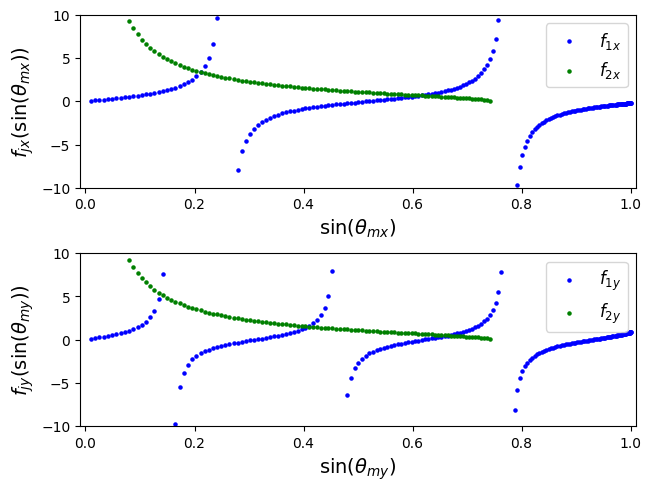

In [37]:
f1x_pts = np.tan(np.pi * w * r_mx_pts / wv - np.pi * mx / 2)
f1y_pts = np.tan(np.pi * t * r_my_pts / wv - np.pi * my / 2)
f2x_pts = np.sqrt(np.sin(theta_c_bar)**2 / r_mx_pts**2 - 1)
f2y_pts = np.sqrt(np.sin(theta_c_bar)**2 / r_my_pts**2 - 1)

fig, ax = plt.subplots(nrows=2, ncols=1, layout='constrained')

ax[0].set_xlabel(r'$\sin(\theta_{mx})$', fontsize=14)
ax[0].set_ylabel(r'$f_{jx}(\sin(\theta_{mx}))$', fontsize=14)
ax[0].set_xlim(-0.01, 1 + 0.01)
ax[0].set_ylim(-10, 10)
ax[0].scatter(r_mx_pts, f1x_pts, c='blue', s = 5, label=r'$f_{1x}$')
ax[0].scatter(r_mx_pts, f2x_pts, c='green', s = 5, label=r'$f_{2x}$')
ax[0].legend(loc='upper right', fontsize=12)

ax[1].set_xlabel(r'$\sin(\theta_{my})$', fontsize=14)
ax[1].set_ylabel(r'$f_{jy}(\sin(\theta_{my}))$', fontsize=14)
ax[1].set_xlim(-0.01, 1 + 0.01)
ax[1].set_ylim(-10, 10)
ax[1].scatter(r_my_pts, f1y_pts, c='blue', s = 5, label=r'$f_{1y}$')
ax[1].scatter(r_my_pts, f2y_pts, c='green', s = 5, label=r'$f_{2y}$')
ax[1].legend(loc='upper right', fontsize=12)

plt.show()

Numerical solution:

In [40]:
fx = lambda r_mx: np.tan(np.pi*(w * r_mx/wv - mx/2)) - np.sqrt(np.sin(theta_c_bar)**2/r_mx**2 - 1)
fy = lambda r_my: np.tan(np.pi*(t * r_my/wv - my/2)) - np.sqrt(np.sin(theta_c_bar)**2/r_my**2 - 1)

dfx = lambda r_mx: np.pi * w * np.sqrt(1 - r_mx**2) / (wv * np.cos(np.tan(np.pi * (w * r_mx / wv - mx/2)))**2) + np.sin(theta_c_bar)**2 * np.sqrt(1 - r_mx**2) / (r_mx**3 * np.sqrt(np.sin(theta_c_bar)**2/r_mx**2 - 1))
dfy = lambda r_my: np.pi * t * np.sqrt(1 - r_my**2) / (wv * np.cos(np.tan(np.pi * (t * r_my / wv - my/2)))**2) + np.sin(theta_c_bar)**2 * np.sqrt(1 - r_my**2) / (r_my**3 * np.sqrt(np.sin(theta_c_bar)**2/r_my**2 - 1))

In [42]:
root = brentq(fx, 0.5, 0.65)
# root = newton(fx, 0.35, dfx)
print(f"Root found: {root:.6f}")

Root found: 0.615294


In [48]:
root = brentq(fy, 0.6, 0.7)
# root = newton(fy, 0.35, dfy)
print(f"Root found: {root:.6f}")

Root found: 0.665960


In [66]:
r_mx_pts = np.array([0.211107, 0.615294])
r_my_pts = np.array([0.136788, 0.407864, 0.665960])

In [71]:
kx_pts = k0 * n1 * r_mx_pts
ky_pts = k0 * n1 * r_my_pts
kx_grid, ky_grid = np.meshgrid(kx_pts, ky_pts, indexing='ij')  # Nx x Ny
beta_grid = np.sqrt((n1 * k0)**2 - kx_grid **2 - ky_grid**2)

# Guiding condition:
mask = (n2 * k0 < beta_grid) & (beta_grid < n1 * k0)
beta_grid_masked = np.where(mask, beta_grid, np.nan)

print(beta_grid_masked)
print()

txt = ''
for i in range(beta_grid_masked.shape[0]):
    for j in range(beta_grid_masked.shape[1]):
        beta = beta_grid_masked[i, j]
        txt += f'beta_{i,j} = {beta:.4f} um^-1\n'
print(txt)

[[5.88498002 5.4013232  4.35056029]
 [4.72053114 4.10179433        nan]]

beta_(0, 0) = 5.8850 um^-1
beta_(0, 1) = 5.4013 um^-1
beta_(0, 2) = 4.3506 um^-1
beta_(1, 0) = 4.7205 um^-1
beta_(1, 1) = 4.1018 um^-1
beta_(1, 2) = nan um^-1



$k_x^2 + k_y^2 \leq n_1^2 k_0^2 \sin^2(\overline{\theta}_c)$

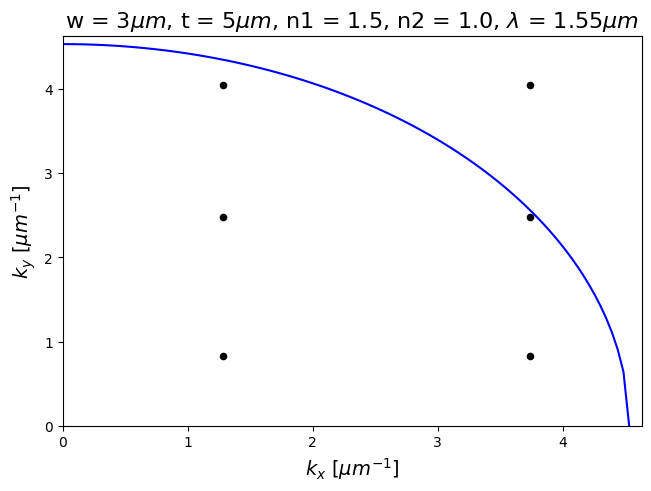

In [68]:
fig, ax = plt.subplots(layout = 'constrained')
ax.set_title(rf'w = {w}$\mu m$, t = {t}$\mu m$, n1 = {n1}, n2 = {n2}, $\lambda$ = {wv}$\mu m$', fontsize=16)
ax.set_xlabel(r'$k_x$ [$\mu m^{-1}$]', fontsize=14)
ax.set_ylabel(r'$k_y$ [$\mu m^{-1}$]', fontsize=14)
ax.set_xlim(0, n1 * k0 * np.sin(theta_c_bar) + 0.1)
ax.set_ylim(0, n1 * k0 * np.sin(theta_c_bar) + 0.1)

kx_aux = np.linspace(0, n1 * k0 * np.sin(theta_c_bar), 100)
ky_aux = np.sqrt((n1 * k0 * np.sin(theta_c_bar))**2 - kx_aux**2)
ax.plot(kx_aux, ky_aux, c='blue')

for kx in kx_pts:
    for ky in ky_pts:
        beta = np.sqrt((n1 * k0)**2 - kx**2 - ky**2)
        ax.scatter(kx, ky, color = 'k', s = 20)

plt.show()